# Advanced ML: Домашнее задание 2

Второе домашнее задание — самое большое в курсе, в нём придётся и концептуально подумать о происходящем, и технические трудности тоже порешать. Как и раньше, в качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для snikolenko); ссылку обязательно нужно прислать в виде сданного домашнего задания на портале Академии. Как всегда, любые комментарии, новые идеи и рассуждения на тему категорически приветствуются. 

Третье задание — это полноценный проект по анализу данных, начиная от анализа постановки задачи и заканчивая сравнением результатов разных моделей. Задача реальная и серьёзная, хотя тему я выбрал развлекательную: мы будем строить **вероятностную рейтинг-систему для спортивного “Что? Где? Когда?” (ЧГК).**

**Background:** в спортивном “Что? Где? Когда?” соревнующиеся команды отвечают на одни и те же вопросы. После минуты обсуждения команды записывают и сдают свои ответы на карточках; побеждает тот, кто ответил на большее число вопросов. Турнир обычно состоит из нескольких десятков вопросов (обычно 36 или 45, иногда 60, больше редко). Часто бывают синхронные турниры, когда на одни и те же вопросы отвечают команды на сотнях игровых площадок по всему миру, т.е. в одном турнире могут играть сотни, а то и тысячи команд. Соответственно, нам нужно:

* построить рейтинг-лист, который способен нетривиально предсказывать результаты будущих турниров;
* при этом, поскольку ЧГК — это хобби, и контрактов тут никаких нет, игроки постоянно переходят из команды в команду, сильный игрок может на один турнир сесть поиграть за другую команду и т.д.; поэтому единицей рейтинг-листа должна быть не команда, а отдельный игрок;
* а что сильно упрощает задачу и переводит её в область домашних заданий на EM-алгоритм — это характер данных: начиная с какого-то момента, в базу результатов начали вносить все повопросные результаты команд, т.е. в данных будут записи вида “какая команда на какой вопрос правильно ответила”.
    
Я сделал за вас только первый шаг: выкачал через API [сайта рейтинга ЧГК](https://rating.chgk.info/) все нужные данные, чтобы сайт не прилёг под вашими многочисленными скрейперами. :) Полученные данные лежат в формате pickle вот здесь: [ссылка](https://www.dropbox.com/s/s4qj0fpsn378m2i/chgk.zip)

1. Прочитайте и проанализируйте данные, выберите турниры, в которых есть данные о составах команд и повопросных результатах (поле mask в results.pkl). Для унификации предлагаю:
    * взять в тренировочный набор турниры с dateStart из 2019 года; 
    * в тестовый — турниры с dateStart из 2020 года.
2. Постройте baseline-модель на основе линейной или логистической регрессии, которая будет обучать рейтинг-лист игроков. Замечания и подсказки:
    * повопросные результаты — это фактически результаты броска монетки, и их предсказание скорее всего имеет отношение к бинарной классификации;
    * в разных турнирах вопросы совсем разного уровня сложности, поэтому модель должна это учитывать; скорее всего, модель должна будет явно обучать не только силу каждого игрока, но и сложность каждого вопроса;
    * для baseline-модели можно забыть о командах и считать, что повопросные результаты команды просто относятся к каждому из её игроков.
3. Качество рейтинг-системы оценивается качеством предсказаний результатов турниров. Но сами повопросные результаты наши модели предсказывать вряд ли смогут, ведь неизвестно, насколько сложными окажутся вопросы в будущих турнирах; да и не нужны эти предсказания сами по себе. Поэтому:
    * предложите способ предсказать результаты нового турнира с известными составами, но неизвестными вопросами, в виде ранжирования команд;
    * в качестве метрики качества на тестовом наборе давайте считать ранговые корреляции Спирмена и Кендалла (их можно взять в пакете scipy) между реальным ранжированием в результатах турнира и предсказанным моделью, усреднённые по тестовому множеству турниров.
4. Теперь главное: ЧГК — это всё-таки командная игра. Поэтому:
    * предложите способ учитывать то, что на вопрос отвечают сразу несколько игроков; скорее всего, понадобятся скрытые переменные; не стесняйтесь делать упрощающие предположения, но теперь переменные “игрок X ответил на вопрос Y” при условии данных должны стать зависимыми для игроков одной и той же команды;
    * разработайте EM-схему для обучения этой модели, реализуйте её в коде;
    * обучите несколько итераций, убедитесь, что целевые метрики со временем растут (скорее всего, ненамного, но расти должны), выберите лучшую модель, используя целевые метрики.
5. А что там с вопросами? Постройте “рейтинг-лист” турниров по сложности вопросов. Соответствует ли он интуиции (например, на чемпионате мира в целом должны быть сложные вопросы, а на турнирах для школьников — простые)? Если будет интересно: постройте топ сложных и простых вопросов со ссылками на конкретные записи в базе вопросов ЧГК (это чисто техническое дело, тут никакого ML нету).
6. Бонус: постройте топ игроков по предсказанной вашей моделью силе игры, а рядом с именами игроков напишите общее число вопросов, которое они сыграли. Скорее всего, вы увидите, что топ занят игроками, которые сыграли совсем мало вопросов, около 100 или даже меньше; если вы поищете их в официальном рейтинге ЧГК, вы увидите, что это какие-то непонятные ноунеймы. В baseline-модели, скорее всего, такой эффект будет гораздо слабее.

    Это естественное свойство модели: за счёт EM-схемы влияние 1-2 удачно сыгранных турниров будет только усиливаться, потому что неудачных турниров, чтобы его компенсировать, у этих игроков нет. Более того, это не мешает метрикам качества, потому что если эти игроки сыграли всего 1-2 турнира в 2019-м, скорее всего они ничего или очень мало сыграли и в 2020, и их рейтинги никак не влияют на качество тестовых предсказаний. Но для реального рейтинга такое свойство, конечно, было бы крайне нежелательным. Давайте попробуем его исправить:
    * сначала жёстко: выберите разумную отсечку по числу вопросов, учитывая, что в одном турнире их обычно 30-50;
    * можно ли просто выбросить игроков, которые мало играли, и переобучить модель? почему? предложите, как нужно изменить модель, чтобы не учитывать слишком мало сыгравших, и переобучите модель;
    * но всё-таки это не слишком хорошее решение: если выбрать маленькую отсечку, будут ноунеймы в топе, а если большую, то получится, что у нового игрока слишком долго не будет рейтинга; скорее всего, никакой “золотой середины” тут не получится;
    * предложите более концептуальное решение для топа игроков в рейтинг-листе; если получится, реализуйте его на практике (за это уж точно будут серьёзные бонусные баллы).
7. Бонус: игроки со временем учатся играть лучше (а иногда бывает и наоборот). А в нашей модели получается, что первые неудачные турниры новичка будут тянуть его рейтинг вниз всю жизнь — это нехорошо, рейтинг должен быть достаточно гибким и иметь возможность меняться даже у игроков, отыгравших сотни турниров. Давайте попробуем этого добиться:
    * если хватит вычислительных ресурсов, сначала сделайте baseline совсем без таких схем, обучив рейтинги на всех турнирах с повопросными результатами, а не только на турнирах 2019 года; улучшилось ли качество предсказаний на 2020?
    * одну схему со временем мы уже использовали: брали для обучения только последний год турниров; примерно так делают, например, в теннисной чемпионской гонке; у этой схемы есть свои преимущества, но есть и недостатки (например, достаточно мало играть год, чтобы полностью пропасть из рейтинга);
    * предложите варианты базовой модели или алгоритма её обучения, которые могли бы реализовать изменения рейтинга со временем; если получится, реализуйте их на практике, проверьте, улучшатся ли предсказания на 2020.


In [1]:
from tqdm import tqdm

import numpy as np
import pandas as pd
from scipy import stats
from scipy.special import logit, expit
import re
import pickle
import requests
import datetime
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import (
    LogisticRegression,
    LinearRegression
)
import warnings
warnings.filterwarnings('ignore')

In [2]:
year_train_tour = 2019
year_test_tour = 2020

## 1 Чтение и анализ данных

In [3]:
with open('hw02_data/results.pkl', 'rb') as fin:
    results = pickle.load(fin)
    
with open('hw02_data/tournaments.pkl', 'rb') as fin:
    tournaments = pickle.load(fin)
    
with open('hw02_data/players.pkl', 'rb') as fin:
    players = pickle.load(fin)

In [4]:
tournaments_df = pd.DataFrame(tournaments.values())
tournaments_df.head(3)

,id,name,dateStart,dateEnd,type,season,orgcommittee,synchData,questionQty
0,1,Чемпионат Южного Кавказа,2003-07-25T00:00:00+04:00,2003-07-27T00:00:00+04:00,"{'id': 2, 'name': 'Обычный'}",/seasons/1,[],None,None
1,2,Летние зори,2003-08-09T00:00:00+04:00,2003-08-09T00:00:00+04:00,"{'id': 2, 'name': 'Обычный'}",/seasons/1,[],None,None
2,3,Турнир в Ижевске,2003-11-22T00:00:00+03:00,2003-11-24T00:00:00+03:00,"{'id': 2, 'name': 'Обычный'}",/seasons/2,[],None,None


In [5]:
tournaments_df = tournaments_df.drop(['season', 'orgcommittee', 'synchData'], axis=1) # удалим лишние поля
tournaments_df.rename(columns={'name': 'tournament_name'}, inplace=True)

tour_type = tournaments_df['type'].apply(pd.Series)
tour_type = tour_type.drop(['id'], axis=1)
tournaments_df['type'] = tour_type['name']

tournaments_df['dateStart'] = pd.to_datetime(tournaments_df['dateStart'], utc=True).dt.date
tournaments_df['dateEnd'] = pd.to_datetime(tournaments_df['dateEnd'], utc=True).dt.date
tournaments_df['year'] = pd.to_datetime(tournaments_df['dateStart']).dt.year

tournaments_df = tournaments_df[(tournaments_df['year'] == year_train_tour) | (tournaments_df['year'] == year_test_tour)]
tournaments_df.set_index('id');

In [6]:
tournaments_df.head(3)

,id,tournament_name,dateStart,dateEnd,type,questionQty,year
3788,4628,Семь сорок,2020-12-30,2020-12-30,Синхрон,"{'1': 12, '2': 12, '3': 12}",2020
3921,4772,Синхрон северных стран. Зимний выпуск,2019-01-05,2019-01-09,Синхрон,"{'1': 12, '2': 12, '3': 12}",2019
4100,4957,Синхрон Биркиркары,2020-02-20,2020-02-27,Синхрон,"{'1': 13, '2': 13, '3': 13}",2020


In [7]:
unique_types_tournaments = tournaments_df['type'].unique()
print(unique_types_tournaments)

['Синхрон' 'Асинхрон' 'Обычный' 'Строго синхронный' 'Общий зачёт']


In [8]:
tournaments_df[tournaments_df['type'] == 'Общий зачёт']

,id,tournament_name,dateStart,dateEnd,type,questionQty,year
4593,5462,Синхронный Кубок Ростова - общий зачёт,2019-02-22,2019-04-30,Общий зачёт,"{'1': 36, '2': 36, '3': 36}",2019
4680,5553,Славянка без раздаток. Общий зачёт,2019-01-26,2019-12-11,Общий зачёт,"{'1': 36, '2': 45, '3': 45, '4': 36, '5': 36, ...",2019
4681,5554,Гран-при Славянки. Общий зачёт,2019-02-01,2019-12-18,Общий зачёт,"{'1': 36, '2': 45, '3': 45, '4': 36, '5': 36, ...",2019
4874,5760,Балтийский Берег. Общий зачёт,2019-10-16,2020-05-27,Общий зачёт,"{'1': 36, '2': 36, '3': 36, '4': 36}",2019
4976,5864,Гран-при Славянки. Общий зачет,2019-02-01,2019-07-09,Общий зачёт,"{'1': 36, '2': 45, '3': 45}",2019
5178,6085,Серия Гран-при. Общий зачёт,2019-09-06,2020-04-14,Общий зачёт,"{'1': 45, '2': 45, '3': 45, '4': 45, '5': 45, ...",2019
5326,6249,Школьный синхрон-lite. Сезон 3,2019-08-31,2020-04-30,Общий зачёт,"{'1': 36, '2': 36, '3': 36, '4': 36, '5': 36, ...",2019
5331,6254,Школьная лига,2019-10-04,2020-03-22,Общий зачёт,"{'1': 36, '2': 36, '3': 36, '4': 36, '5': 36, ...",2019
5332,6255,ОВСЧ,2019-09-20,2020-02-19,Общий зачёт,"{'1': 36, '2': 36, '3': 36, '4': 36, '5': 36, ...",2019
5341,6265,Большой шлем Славянки,2020-01-25,2021-01-05,Общий зачёт,"{'1': 45, '2': 45, '3': 36, '4': 36}",2020


In [9]:
tournaments_df[tournaments_df['dateStart'] == datetime.date(2020, 2, 1)]

,id,tournament_name,dateStart,dateEnd,type,questionQty,year
5029,5925,Lida Major,2020-02-01,2020-02-02,Обычный,"{'1': 10, '2': 10, '3': 10, '4': 10, '5': 10, ...",2020
5104,6002,Славянка без раздаток. 1 этап,2020-02-01,2020-02-08,Синхрон,"{'1': 15, '2': 15, '3': 15}",2020
5156,6056,Кубок Ярослава Мудрого,2020-02-01,2020-02-02,Обычный,"{'1': 15, '2': 15, '3': 15, '4': 15, '5': 15}",2020
5265,6185,Кубок Сигулды,2020-02-01,2020-02-02,Обычный,"{'1': 12, '2': 12, '3': 12, '4': 12, '5': 12}",2020
5306,6229,Кубок дедушек-моделей,2020-02-01,2020-02-08,Синхрон,"{'1': 12, '2': 12, '3': 12}",2020
5380,6307,Славянка без раздаток. Общий зачёт,2020-02-01,2020-12-05,Общий зачёт,"{'1': 45, '2': 36}",2020


Турниры с типом `Общий зачет` являются дублями других турниров, но их с счастью мало, поэтому мы их можем удалить

In [10]:
tournaments_df = tournaments_df[tournaments_df['type'] != 'Общий зачёт']

In [11]:
print(f'Количество турниров за {year_train_tour} год: {len(tournaments_df[tournaments_df["year"] == year_train_tour])}')
print(f"Количество турниров за {year_test_tour} год: {len(tournaments_df[tournaments_df['year'] == year_test_tour])}")

Количество турниров за 2019 год: 680
Количество турниров за 2020 год: 413


In [12]:
players_df = pd.DataFrame(players.values())
players_df['patronymic'].fillna(value='_', inplace=True)
players_df['Name'] = (players_df['name'].str.cat(players_df['patronymic'], sep =' ')).str.cat(players_df['surname'], sep =' ')
players_df.pop('name')
players_df.pop('patronymic')
players_df.pop('surname')
players_df.rename(columns={'Name': 'name'}, inplace=True)

In [13]:
players_df.head(6)

,id,name
0,1,Алексей _ Абабилов
1,10,Игорь Абалов
2,11,Наталья Юрьевна Абалымова
3,12,Артур Евгеньевич Абальян
4,13,Эрик Евгеньевич Абальян
5,14,Василий Абанин


In [14]:
encode_id2name = {}
decode_name2id = {}
for row in players_df.values:
    encode_id2name[row[0]] = row[-1]
    decode_name2id[row[-1]] = row[0]

In [15]:
have_X = 0
have_question = 0
have_X_question = 0
no_mask = 0
have_mask = 0

for tour_id, teams in tqdm(results.items()):
    if tour_id in tournaments_df['id']:
        flag_have_max = True
        flag_no_question = True
        flag_no_X = True
        for i, team in enumerate(teams):
            if 'mask' not in team or team['mask'] is None:
                flag_have_max = False
            else:
                if '?' in team['mask']:
                    flag_no_question = False
                if 'X' in team['mask']:
                    flag_no_X = False

        no_mask += not(flag_have_max)
        have_mask += flag_have_max
        have_X_question += not(flag_no_question) and not(flag_no_X)
        have_question += not(flag_no_question)
        have_X += not(flag_no_X)

print("mask присутствует в {} турнирах".format(have_mask))
print("mask не присутствует в {} турнирах".format(no_mask))
print("В mask есть только ? в {} турнирах".format(have_question - have_X_question))
print("В mask есть только X в {} турнирах".format(have_X - have_X_question))
print("В mask есть ? и X в {} турнирах".format(have_X_question))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5528/5528 [00:00<00:00, 36609.79it/s]

mask присутствует в 1026 турнирах
mask не присутствует в 26 турнирах
В mask есть только ? в 1 турнирах
В mask есть только X в 108 турнирах
В mask есть ? и X в 2 турнирах


Из вывода сверху видно что `?` встречается только в 3 турнирах, поэтому можем их отбросить.

Произведем удаление турниров по следующим критериям:
* Турниры не из 2019-202 годов
* Турниры без результатов
* Турниры без данных о составе команд
* Турниры без повопросныз результатах
* Турниры где присутствует `?` и `X`
* Турниры с разным кол-вом ответов

In [16]:
good_tour_id = set(results.keys())
print("Изначально турниров: {}".format(len(good_tour_id)))


bad_tour_id = set()
for tour_id in good_tour_id:
    if not tournaments_df['id'].isin([tour_id]).any():
        bad_tour_id.add(tour_id)
    
    if len(results[tour_id]) == 0:
        bad_tour_id.add(tour_id)
    
    teams = results[tour_id]
    for i, team in enumerate(teams):
        if len(team['teamMembers']) == 0:
            bad_tour_id.add(tour_id)
            break
        elif 'mask' not in team or team['mask'] is None:
            bad_tour_id.add(tour_id)
            break
        elif '?' in team['mask'] or 'X' in team['mask']:
            bad_tour_id.add(tour_id)
            break
        
    else:
        mask_lens = set()
        for i, team in enumerate(teams):
            mask_lens.add(len(team['mask']))

        if len(mask_lens) > 1:
            bad_tour_id.add(tour_id)    

good_tour_id = good_tour_id - bad_tour_id
print("Осталось турниров: {}".format(len(good_tour_id)))

Изначально турниров: 5528
Осталось турниров: 728


In [17]:
tours_id = tournaments_df['id'].values
tours_name = tournaments_df['tournament_name'].values

tour_id_name_dict = {}

for t, n in zip(tours_id, tours_name):
    tour_id_name_dict[t] = n

In [18]:
tour_id2year = {}
for t in tournaments_df.values:
    tour_id2year[t[0]] = t[-1]

In [19]:
tour_team_question_df = {
    "year": [],
    "tournament_id": [],
    "teams_id": [],
    "qustions_id": [],
}

team_members_df = {
    "year": [],
    "team_id": [],
    "team_name": [],
    "players_id": [],
}

df = {
    'year': [],
    'tournament_id': [],
    'team_id': [],
    'player_id': [],
    'question_id': [],
    'y': [],
}

tour_id2teams_id = {}
team_id2players_id = {}
tour_id2teams_results = {}
tour_id2questions = {}

q_id_cnt = 0


In [20]:
for tour_id in tqdm(good_tour_id):
    teams_id = []
    year_tour = tour_id2year[tour_id]
    if year_tour == year_test_tour:
        tour_id2teams_results[tour_id] = {}
        
    list_of_teams = results[tour_id]
    flag_first_team = True
    qustions_id = []
    for team in list_of_teams:
        players_id = []
        team_id = team['team']['id']
        teams_id.append(team_id)
        team_name = team['team']['name']
        team_mask = team['mask']
        team_members = team['teamMembers']
        team_res = 0

        if flag_first_team:
            for m in team_mask:
                q_id_cnt += 1
                qustions_id.append(q_id_cnt)
                
            flag_first_team = False

        for m in team_mask:
            team_res += int(m)
        
        for member in team_members:
            player_id = member['player']['id']
            players_id.append(player_id)
            
            for i, q_id in enumerate(qustions_id): 
                df['tournament_id'].append(tour_id)
                df['year'].append(year_tour)
                df['team_id'].append(team_id)
                df['player_id'].append(player_id)
                df['question_id'].append(q_id)
                df['y'].append(1 - int(team_mask[i] == '0'))
        
        team_members_df["team_id"].append(team_id)
        team_members_df["players_id"].append(players_id)
        team_members_df["year"].append(year_tour)
        team_members_df["team_name"].append(team_name)
        
        if year_tour == year_test_tour:
            team_id2players_id[team_id] = players_id
            tour_id2teams_results[tour_id][team_id] = team_res
        
    tour_team_question_df["year"].append(year_tour)
    tour_team_question_df["tournament_id"].append(tour_id)
    tour_team_question_df["teams_id"].append(teams_id)
    
    if year_tour == year_test_tour:
        tour_id2teams_id[tour_id] = teams_id
    
    if year_tour == year_train_tour:
        tour_id2questions[tour_id] = qustions_id
        
    tour_team_question_df["qustions_id"].append(qustions_id)
        
tour_team_question_df = pd.DataFrame(tour_team_question_df)
team_members_df = pd.DataFrame(team_members_df)
df = pd.DataFrame(df)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 728/728 [00:26<00:00, 27.17it/s]


In [21]:
train_df = df[df['year'] == year_train_tour]
test_df = df[df['year'] == year_test_tour]

In [22]:
print(f"Train size: {len(train_df)}\n Test size: {len(test_df)}")

Train size: 12752296
 Test size: 3136454


# 2 Baseline-модель на основе  логистической регрессии

Постройте `baseline`-модель на основе линейной или логистической регрессии, которая будет обучать рейтинг-лист игроков. Замечания и подсказки:

* повопросные результаты — это фактически результаты броска монетки, и их предсказание скорее всего имеет отношение к бинарной классификации;
* в разных турнирах вопросы совсем разного уровня сложности, поэтому модель должна это учитывать; скорее всего, модель должна будет явно обучать не только силу каждого игрока, но и сложность каждого вопроса;
* для `baseline`-модели можно забыть о командах и считать, что повопросные результаты команды просто относятся к каждому из её игроков.

---


In [23]:
enc = OneHotEncoder(handle_unknown='ignore')

X_train = enc.fit_transform(train_df[['player_id', 'question_id']])
X_test = enc.transform(test_df[['player_id', 'question_id']])

y_train = train_df['y']
y_test = test_df['y']

In [24]:
logreg_model = LogisticRegression(penalty='l2', solver='liblinear')
logreg_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [25]:
players_force = logreg_model.coef_[0][:len(train_df.player_id.unique())]
questions_difficulty = logreg_model.coef_[0][len(train_df.player_id.unique()):]

## Топ-100 игроков baseline модели

In [26]:
top_k = 100

players_rating_baseline = []
player_id2player_force = {}

for i, player_id in tqdm(enumerate(enc.categories_[0])):
    player_name = encode_id2name[player_id]
    player_force = players_force[i]
    player_id2player_force[player_id] = player_force
    players_rating_baseline.append({
        'player_id': player_id, 
        'player_name': player_name, 
        'player_force': player_force
    })
    
players_rating_baseline = sorted(players_rating_baseline, key=lambda d: d['player_force'], reverse=True)
players_rating_baseline = pd.DataFrame(players_rating_baseline)
players_rating_baseline['pred_rating_pos'] = players_rating_baseline.index + 1

short_players_rating_baseline = players_rating_baseline[:top_k]

52016it [00:00, 363754.60it/s]


In [27]:
short_players_rating_baseline[:20]

,player_id,player_name,player_force,pred_rating_pos
0,27403,Максим Михайлович Руссо,3.988626,1
1,4270,Александра Владимировна Брутер,3.847355,2
2,28751,Иван Николаевич Семушин,3.792374,3
3,27822,Михаил Владимирович Савченков,3.765026,4
4,30270,Сергей Леонидович Спешков,3.668550,5
5,30152,Артём Сергеевич Сорожкин,3.667841,6
6,18036,Михаил Ильич Левандовский,3.528440,7
7,20691,Станислав Григорьевич Мереминский,3.508388,8
8,22799,Сергей Игоревич Николенко,3.446908,9
9,30260,Евгений Павлович Спектор,3.446074,10


# 3 Качество baseline рейтинг-системы 

Качество рейтинг-системы оценивается качеством предсказаний результатов турниров. Но сами повопросные результаты наши модели предсказывать вряд ли смогут, ведь неизвестно, насколько сложными окажутся вопросы в будущих турнирах; да и не нужны эти предсказания сами по себе. Поэтому:

* предложите способ предсказать результаты нового турнира с известными составами, но неизвестными вопросами, в виде ранжирования команд;
* в качестве метрики качества на тестовом наборе давайте считать ранговые корреляции Спирмена и Кендалла (их можно взять в пакете scipy) между реальным ранжированием в результатах турнира и предсказанным моделью, усреднённые по тестовому множеству турниров.

---

*Для самопроверки: у меня средняя корреляция Спирмена на тестовом множестве 2020 года во всех моделях, включая baselines, получалась порядка 0.7-0.8, а корреляция Кендалла — порядка 0.5-0.6. Если у вас корреляции вышли за 0.9 или, наоборот, упали ниже 0.3, скорее всего где-то баг.*

---

Способ предсказания результата нового турнира:

* Средний рейтинг будем считать равным среднему рейтингу игроков в ней по этому рейтингу приизведем ранжирование
* Для каждого турнира вычислим ранговые корреляции Спирмена и Кендалла между реальным ранжированием команд в турнире и предсказанным моделью.
* Усредним корреляции по турнирам

In [28]:
def correlation(tour_id2teams_id: dict, 
                tour_id2teams_results: dict,
                team_id2players_id: dict,
                player_id2player_force: dict):
    spearman_corrs, kendall_corrs = [], []

    for tour_id, teams in tqdm(tour_id2teams_id.items()):
        pred_ratings = []
        true_ratings = []
        for team_id in teams:
            true_res = tour_id2teams_results[tour_id][team_id]
            pred_res = 0
            players_cnt = 0
            for p_id in team_id2players_id[team_id]:
                if p_id in player_id2player_force:
                    pred_res += player_id2player_force[p_id]
                    players_cnt += 1

            if players_cnt == 0:
                continue

            pred_res /= players_cnt
            pred_ratings.append(pred_res)
            true_ratings.append(true_res)

        spearman_corrs.append(stats.spearmanr(true_ratings, pred_ratings).correlation)
        kendall_corrs.append(stats.kendalltau(true_ratings, pred_ratings).correlation)
        
    return np.mean(np.array(spearman_corrs)), np.mean(np.array(kendall_corrs))


In [29]:
sperman_corrs, kendall_corrs = correlation(tour_id2teams_id, tour_id2teams_results, team_id2players_id, player_id2player_force)
print(f"Корреляция Спирмена для baseline модели: {sperman_corrs}")
print(f"Корреляция Кендалла для baseline модели: {kendall_corrs}")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 303.80it/s]

Корреляция Спирмена для baseline модели: 0.7575214933996173
Корреляция Кендалла для baseline модели: 0.6008106488450157


# 4 EM-схема

Теперь главное: ЧГК — это всё-таки командная игра. Поэтому:

* предложите способ учитывать то, что на вопрос отвечают сразу несколько игроков; скорее всего, понадобятся скрытые переменные; не стесняйтесь делать упрощающие предположения, но теперь переменные “игрок X ответил на вопрос Y” при условии данных должны стать зависимыми для игроков одной и той же команды;
* разработайте EM-схему для обучения этой модели, реализуйте её в коде;
* обучите несколько итераций, убедитесь, что целевые метрики со временем растут (скорее всего, ненамного, но расти должны), выберите лучшую модель, используя целевые метрики.

In [30]:
step_k = 5
eps = 1e-8
em_model = LinearRegression()
em_train_df = train_df.copy(deep=True)
em_train_df.drop(columns=['y'], inplace=True)
em_train_df['pred_for_player'] = logreg_model.predict_proba(X_train)[:, 1]

best_spearman_metric = 0
best_kendall_metric = 0
best_model = None 
list_spearman_corrs = []
list_kendall_corrs = []
steps_list = []

In [31]:
for cur_step in range(1, step_k + 1):
    # E шаг.
    em_train_df['invers_pred_for_player'] = 1 - em_train_df['pred_for_player']
    tmp = 1 - em_train_df.groupby(['tournament_id', 'team_id', 'question_id'])['invers_pred_for_player'].prod()
    tmp = tmp.rename('pred_for_team')
    
    em_train_df = pd.merge(em_train_df, tmp, on=['tournament_id', 'team_id', 'question_id'])
    tmp = em_train_df['pred_for_player'] / em_train_df['pred_for_team']
    
    em_train_df['z'] = tmp
    em_train_df['z'] = np.where(y_train == 1, tmp, 0)
    em_train_df['z'] = np.clip(em_train_df['z'], eps, 1 - eps)

    # M шаг.
    em_model.fit(X_train, logit(em_train_df['z']))
    em_train_df.drop(columns=['z', 'invers_pred_for_player'], inplace=True)

    em_train_df['pred_for_player'] = expit(em_model.predict(X_train))
    em_train_df['pred_for_player'] = np.clip(em_train_df['pred_for_player'], eps, 1 - eps)
    em_train_df.drop(columns=['pred_for_team'], inplace=True)

    em_players_force = em_model.coef_.ravel()[:len(em_train_df.player_id.unique())].astype(float)
    
    em_player_id2player_force = {}
    for i, player_id in enumerate(enc.categories_[0]):
        player_force = em_players_force[i]
        em_player_id2player_force[player_id] = player_force

    em_spearman_corrs, em_kendall_corrs = correlation(tour_id2teams_id,
                                                     tour_id2teams_results,
                                                     team_id2players_id,
                                                     em_player_id2player_force)
    
    steps_list.append(cur_step)
    list_spearman_corrs.append(em_spearman_corrs)
    list_kendall_corrs.append(em_kendall_corrs)
    
    print(f"\tStep {cur_step}:")
    print(f"\tКорреляция Спирмена для EM-схемы: {em_spearman_corrs}")
    print(f"\tКорреляция Кендалла  для EM-схемы: {em_kendall_corrs}")
    print('-' * 15)

    if best_spearman_metric < em_spearman_corrs:
        best_spearman_metric = em_spearman_corrs
        best_kendall_metric = em_kendall_corrs
        best_model = em_model
        
print("Корреляция Спирмена для EM-схемы: {}".format(best_spearman_metric))
print("Корреляция Кендалла  для EM-схемы: {}".format(best_kendall_metric))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 443.07it/s]


	Step 1:
	Корреляция Спирмена для EM-схемы: 0.752701336172073
	Корреляция Кендалла  для EM-схемы: 0.5974392473380481
---------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 516.20it/s]


	Step 2:
	Корреляция Спирмена для EM-схемы: 0.7513575035073605
	Корреляция Кендалла  для EM-схемы: 0.5989264679611721
---------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 529.48it/s]


	Step 3:
	Корреляция Спирмена для EM-схемы: 0.7410708299557863
	Корреляция Кендалла  для EM-схемы: 0.5872293922461781
---------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 537.31it/s]


	Step 4:
	Корреляция Спирмена для EM-схемы: 0.7367517378722113
	Корреляция Кендалла  для EM-схемы: 0.5837510426665945
---------------


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [00:00<00:00, 539.32it/s]

	Step 5:
	Корреляция Спирмена для EM-схемы: 0.7310622369039879
	Корреляция Кендалла  для EM-схемы: 0.5777903080869363
---------------
Корреляция Спирмена для EM-схемы: 0.752701336172073
Корреляция Кендалла  для EM-схемы: 0.5974392473380481


<Axes: xlabel='Step', ylabel='Value'>

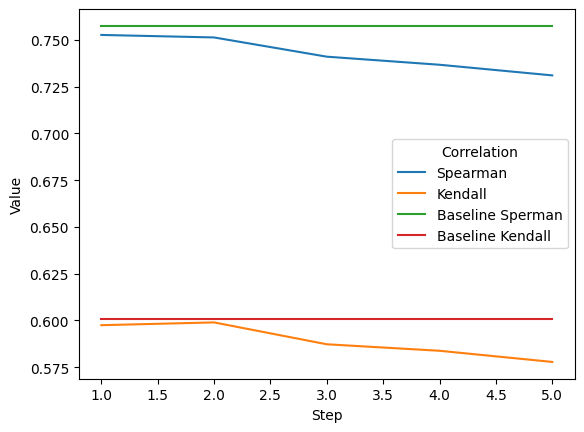

In [33]:
data_plot = {
    "Step": [],
     'Value': [],
     "Correlation": []
}

for i in range(len(steps_list)):
    data_plot["Step"].append(steps_list[i])
    data_plot['Value'].append(list_spearman_corrs[i])
    data_plot["Correlation"].append("Spearman")
    
    data_plot["Step"].append(steps_list[i])
    data_plot['Value'].append(list_kendall_corrs[i])
    data_plot["Correlation"].append("Kendall")
    
    data_plot["Step"].append(steps_list[i])
    data_plot['Value'].append(sperman_corrs)
    data_plot["Correlation"].append("Baseline Sperman")
    
    data_plot["Step"].append(steps_list[i])
    data_plot['Value'].append(kendall_corrs)
    data_plot["Correlation"].append("Baseline Kendall")

sn.lineplot(data=data_plot, x="Step", y="Value", hue="Correlation")

Как можно видеть из графиков корреляция ухудшилась....

# 5 "Рейтинг-лист" турниров 

Постройте “рейтинг-лист” турниров по сложности вопросов. Соответствует ли он интуиции (например, на чемпионате мира в целом должны быть сложные вопросы, а на турнирах для школьников — простые)? Если будет интересно: постройте топ сложных и простых вопросов со ссылками на конкретные записи в базе вопросов ЧГК (это чисто техническое дело, тут никакого ML нету).

In [34]:
question_id2difficult = {}

for i, question_id in tqdm(enumerate(enc.categories_[1])):
    question_id2difficult[question_id] = questions_difficulty[i]

26890it [00:00, 960467.65it/s]


In [35]:
tour_id_diff = []

for tour_id, qs in tour_id2questions.items():
    d = 0
    for q_id in qs:
        d += question_id2difficult[q_id]
    tour_id_diff.append({'tour_id': tour_id, 'tour_name':tour_id_name_dict[tour_id], 'difficulty': d})

tour_id_diff = sorted(tour_id_diff, key=lambda d: d['difficulty'], reverse=True)
tour_id_diff = pd.DataFrame(tour_id_diff)
tour_id_diff['rating_pos'] = tour_id_diff.index + 1

## Топ-30 сложных турниров

In [36]:
tour_id_diff[-30:]

,tour_id,tour_name,difficulty,rating_pos
554,5421,Львов зимой. Адвокат,-50.668690,555
555,5656,БЛИК,-50.955985,556
556,5649,Пятый интернешенол,-51.378841,557
557,5778,Знатокиада. Всеобщий Открытый турнир,-51.537023,558
558,5161,Антибинго,-51.854641,559
559,5632,"Кубок Победы, или Ультиматум - 17 (КВ)",-52.210253,560
560,5538,Чемпионат Беларуси,-52.348444,561
561,5833,Memel Cup,-53.224100,562
562,5741,All Cats Are Beautiful,-53.767929,563
563,5826,Лето в Тюмени,-53.965724,564


## Топ-30 легких турниров

In [37]:
tour_id_diff[:30]

,tour_id,tour_name,difficulty,rating_pos
0,5592,Студенческая лига ЧТ,148.684511,1
1,6008,Малый кубок Физтеха,135.799242,2
2,5660,Первая лига ЧТ,105.699559,3
3,6011,Щит и Меч,100.328176,4
4,5388,Олимпиада Приволжского федерального округа. Финал,92.825009,5
5,5457,Студенческий чемпионат Калининградской области,90.674474,6
6,5488,Чемпионат Беларуси среди школьников,90.487123,7
7,5658,Кубок Югры,90.183700,8
8,5644,Школьный чемпионат России,89.839295,9
9,5013,(а)Синхрон-lite. Лига старта. Эпизод V,87.911780,10


Из вывода сверху видно что в `Легких турнирах` встречаются даже чемпионаты разных стран, что странно (Хотя все может быть). Ожидал более явного разграничения по уровню сложности